<a href="https://colab.research.google.com/github/rodeskylite/chill-in-out/blob/Main/Practico3_Rodrigo_Aguilera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomado IA: Aplicaciones 1 - NLP**. <br> Práctico 3: Modelos de lenguaje (ElMo, BERT, GPT2)
---
---

**Profesores:**
- Carlos Aspillaga
- Pablo Messina

**Ayudante:**
- Mathias Lambert
---
---

# **Instrucciones Generales**

El siguiente práctico se debe realizar **individualmente**. El formato de entrega es el **archivo .ipynb con todas las celdas ejecutadas**. Todas las preguntas deben ser respondidas en las celdas dispuestas para ello. No se aceptará el _output_ de una celda de código como respuesta.

**Nombre Alumno:** Rodrigo Aguilera


El siguiente práctico cuenta con 4 partes y contendrá actividades a realizar.

**IMPORTANTE: habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0**

# **Índice**

>[Diplomado IA: Aplicaciones 1 - NLP.  Práctico 3: Modelos de lenguaje (ElMo, BERT, GPT2)](#scrollTo=tHopPtVaNF1K)

>[Instrucciones Generales](#scrollTo=D4--58EgLXxI)

>[Índice](#scrollTo=jCb8075QLdVx)

>[ELMo](#scrollTo=QowbUszVAyrv)

>>[Instalación de dependencias](#scrollTo=s_-RHBZkLxIO)

>>[ELMo: Uso Básico](#scrollTo=GeY2bVqKLUz1)

>>[Visualizando los embeddings de ELMo](#scrollTo=Kzd_GOxunlh5)

>>[Actividades](#scrollTo=QiOarh-8d81k)

>[Librería "Transformers", de Huggingface](#scrollTo=XmRz5CaMDuNJ)

>>[Instalación de dependencias](#scrollTo=WAl2ZQQ3Lm9R)

>>[Uso básico de la librería](#scrollTo=IEf542-yNkLX)

>>[Actividad](#scrollTo=rzmdJB4EObaw)

>[BERT](#scrollTo=TUoT7x1uNu0i)

>>[Finetuning de BERT para detectar Fake News](#scrollTo=9D9wMxO7NDAy)

>[GPT-2](#scrollTo=uCE6qym-NxJs)

>>[GPT-2: Generación de texto](#scrollTo=sQI4zJORMjkX)

>>[Actividades](#scrollTo=rKftFZ2W4XKJ)

>[Actividad Final](#scrollTo=Acvhf7xiPN1W)



# **ELMo**

![ELMo](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/output_YyJc8E.gif)

##Instalación de dependencias

Preparar librerias necesarias: Tensorflow, tensorflow-hub y sacremoses.

Sacremoses corresponde al tokenizador original usado por los autores de ELMo

In [ ]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub
!pip install sacremoses

Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.7/dist-packages (0.12.0)
     |████████████████████████████████| 901kB 10.0MB/s 


## ELMo: Uso Básico

Con tensorflow, para usar ELMo preentrenado basta con cargarlo desde TensorflowHub.

En el ejemplo usaremos el ELMo-large original (en inglés), pero existen varios modelos preentrenados alternativos. Por ejemplo, existe ELMo para documentos médicos (pubmed), para diferentes idiomas, etc.

Aquí dejamos algunos links a versiones preentrenadas de ELMo que pueden ser de utilidad para usted:

https://allennlp.org/elmo

https://github.com/lastrodrigo/SpanishElmoFullWeights

https://github.com/HIT-SCIR/ELMoForManyLangs

In [ ]:
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
from sacremoses import MosesTokenizer
import numpy as np
tf.disable_eager_execution()

In [ ]:
def prepare_input(input, tokenizer):
    # create array of tokenized texts
    tokenized_inputs = []
    if type(input) == list:
        for item in input:
            tokenized_inputs.append(tokenizer.tokenize(item, escape=False))
    else:
        tokenized_inputs.append(tokenizer.tokenize(input, escape=False))
    
    # create lengths array and add paddings
    tokens_length = [len(s) for s in tokenized_inputs]
    for i in range(len(tokens_length)):
        while len(tokenized_inputs[i]) < max(tokens_length):
            tokenized_inputs[i].append("")

    return tokenized_inputs, { "tokens": tokenized_inputs, "sequence_len": tokens_length }

In [ ]:
# Load pre trained ELMo model
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)
moses_tokenizer = MosesTokenizer()

In [ ]:
text = "I love to eat pizza!"
tokenized_text, input = prepare_input(text, moses_tokenizer)

# create an instance of ELMo
output = elmo(inputs=input, signature="tokens", as_dict=True)["elmo"]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

embeddings = sess.run(output[:])

print('Tokenized text: '+str(tokenized_text[0]))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
#print('Output values: '+str(embeddings))


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Tokenized text: ['I', 'love', 'to', 'eat', 'pizza', '!']
Output type: <class 'numpy.ndarray'>
Output shape: (1, 6, 1024)


In [ ]:
text = "I love to eat chocolate ice-cream!"
tokenized_text, input = prepare_input(text, moses_tokenizer)

# create an instance of ELMo
output = elmo(inputs=input, signature="tokens", as_dict=True)["elmo"]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

embeddings = sess.run(output[:])

print('Tokenized text: '+str(tokenized_text[0]))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
#print('Output values: '+str(embeddings))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Tokenized text: ['I', 'love', 'to', 'eat', 'chocolate', 'ice-cream', '!']
Output type: <class 'numpy.ndarray'>
Output shape: (1, 7, 1024)


In [ ]:
text = ["I love to eat chocolate ice-cream!", "I love to eat pizza!"]
tokenized_text, input = prepare_input(text, moses_tokenizer)

# create an instance of ELMo
output = elmo(inputs=input, signature="tokens", as_dict=True)["elmo"]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

embeddings = sess.run(output[:])

print('Tokenized text: '+str(tokenized_text))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
#print('Output values: '+str(embeddings))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Tokenized text: [['I', 'love', 'to', 'eat', 'chocolate', 'ice-cream', '!'], ['I', 'love', 'to', 'eat', 'pizza', '!', '']]
Output type: <class 'numpy.ndarray'>
Output shape: (2, 7, 1024)


In [ ]:
text = ["I love to eat chocolate ice-cream!", "I love to eat pizza!", "I love Chile"]
tokenized_text, input = prepare_input(text, moses_tokenizer)

# create an instance of ELMo
output = elmo(inputs=input, signature="tokens", as_dict=True)["elmo"]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

embeddings = sess.run(output[:])

print('Tokenized text: '+str(tokenized_text))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
#print('Output values: '+str(embeddings))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Tokenized text: [['I', 'love', 'to', 'eat', 'chocolate', 'ice-cream', '!'], ['I', 'love', 'to', 'eat', 'pizza', '!', ''], ['I', 'love', 'Chile', '', '', '', '']]
Output type: <class 'numpy.ndarray'>
Output shape: (3, 7, 1024)


Estos vectores podríamos usarlos para cualquier tarea down-stream. Podríamos usarlos en lugar de los vectores Word2Vec de la clase pasada, de tal manera de que la representación considere contexto y no solo las palabras individualmente.

## Visualizando los embeddings de ELMo

A continuación extraeremos los embeddings ELMo para diferentes oraciones donde se usa la palabra "play" con diferentes sentidos semánticos.

In [ ]:
sentences = ["Chile plays soccer like anyone else",
             "My father plays the piano every day",
             "We went to see the play Romeo and Juliet at the theater", 
             "A child is playing the guitar",
             "There was absolute silence during the play",
             "The coach devised a great play that put the visiting team on the defensive",
             "The children went out to play in the park",
             "He plays the King, and she's the Queen",
             "No part of the brain plays the role of permanent memory",
             "I've practiced the piano off and on, but I still can't play very well",
             "We especially like to play jazz together",
             "You can play the DVD now",
             "to play cannon upon a fortification",
             "My son thinks he can play music",
             "Look at the score now ... 23 plays 8!",
             "You played me!",
             "to play a trump in a card game",
             "His latest film is playing in the local theatre tomorrow",
             "He played the torch beam around the room"]

tokenized_text, input = prepare_input(sentences, moses_tokenizer)

# create an instance of ELMo
output = elmo(inputs=input, signature="tokens", as_dict=True)["elmo"]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

embeddings = sess.run(output[:])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
# concatenamos todo para que quede un gran numpy array donde cada fila es un token y cada columna un feature
tokens = np.concatenate(embeddings, axis=0)
labels = [item for sublist in tokenized_text for item in sublist]

A continuación visualizaremos los embeddings (que son multidimensionales) llevándolos a 2D gracias a una técnica llamada T-SNE (van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data) que esencialmente intenta preservar las relaciones de cercanía entre elementos.

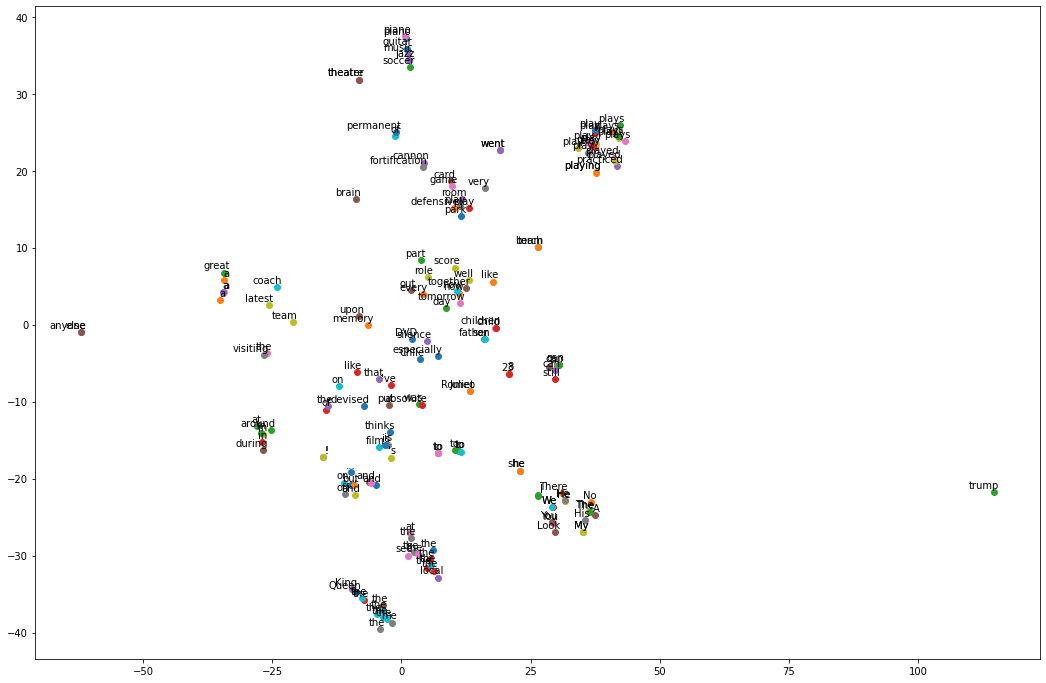

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne_model = TSNE(perplexity=6, n_components=2, init='random', n_iter=800, random_state=2)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
clean_labels = []
for i, value in enumerate(new_values):
    if len(labels[i]) > 0:
        x.append(value[0])
        y.append(value[1])
        clean_labels.append(labels[i])
    
plt.figure(figsize=(18, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(clean_labels[i],
                  xy=(x[i], y[i]),
                  xytext=(5, 2),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')
plt.show()

## Actividades

Como vimos anteriormente, obtener los embeddings de ELMo es sencillo. Lo único con que hay que ser cuidadosos es al usar el resultado entregado por ELMo. Las actividades a continuación buscan precisamente reforzar el entendimiento de este punto.

*   **1) Observe las dimensiones del resultado entregado por ELMo al ejecutarlo sobre las oraciones de ejemplo. Por ejemplo, al ejecutarlo sobre el input ["I love to eat chocolate ice-cream!", "I love to eat pizza!", "I love Chile"] se puede ver que entrega un arreglo de tamaño (3, 7, 1024) ¿Qué representa la primera componente del tamaño de este arreglo (en el ejemplo, el 3)?**

In [ ]:
#@title Respuesta 1

Primera componente = 'Uno para cada oracion' #@param ["seleccione una opcion","Uno para cada oracion","Uno para cada token","Uno para cada estado oculto final de cada bi-LSTM luego de procesar toda la oracion", "Uno para cada dimension del estado oculto (o entrada o salida)","Uno para cada peso de las bi-LSTMs correspondientes a esa capa","Uno para cada capa (estado oculto o entrada o salida)"]

*   **2) En el ejemplo de la actividad 1, vimos que la salida es de tamaño (3, 7, 1024) ¿Qué representa la segunda componente del tamaño de este arreglo (en el ejemplo, el 7)?**

In [ ]:
#@title Respuesta 2

Segunda componente = 'Uno para cada token' #@param ["seleccione una opcion","Uno para cada oracion", "Uno para cada token","Uno para cada estado oculto final de cada bi-LSTM luego de procesar toda la oracion", "Uno para cada dimension del estado oculto (o entrada o salida)","Uno para cada peso de las bi-LSTMs correspondientes a esa capa","Uno para cada capa (estado oculto o entrada o salida)"]

*   **3) En el ejemplo de la actividad 1, vimos que la salida es de tamaño (3, 7, 1024) ¿Qué representa la tercera componente del tamaño de este arreglo (en el ejemplo, el 1024)?**

In [ ]:
#@title Respuesta 3

Tercera componente = 'Uno para cada dimension del estado oculto (o entrada o salida)' #@param ["seleccione una opcion","Uno para cada oracion", "Uno para cada token","Uno para cada estado oculto final de cada bi-LSTM luego de procesar toda la oracion", "Uno para cada dimension del estado oculto (o entrada o salida)","Uno para cada peso de las bi-LSTMs correspondientes a esa capa","Uno para cada capa (estado oculto o entrada o salida)"]

*   **4) A partir del output que entrega ELMo para la oración "I love to eat chocolate ice-cream!", extraiga los embeddings correspondientes a la palabra "chocolate".** Importante!: Imprima en pantalla el vector, para poder verificar su respuesta. No importa si numpy muestra el resultado truncado al hacer el print

*Hint: En la dimensión correspondiente, la implementación de ELMo entrega los resultados ordenados: el primer elemento será el token de más a la izquierda, y el último será el token de más a la derecha.*

In [ ]:

# Escriba aquí su respuesta.
# No olvide hacer print() de la salida!

# create an instance of ELMo
text = "I love to eat chocolate ice-cream!"
output = elmo(inputs=input, signature="tokens", as_dict=True)["elmo"]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

embeddings = sess.run(output[:])

print('Tokenized text: '+str(tokenized_text))
print('Output type: '+str(type(embeddings)))
print('Output shape: '+str(embeddings.shape))
print(embeddings[0,5,:])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Tokenized text: [['She', 'is', 'a', 'very', 'good', 'soccer', 'player', '.'], ['She', 'likes', 'chocolate', '', '', '', '', ''], ['She', 'is', 'Chilean', '', '', '', '', '']]
Output type: <class 'numpy.ndarray'>
Output shape: (3, 8, 1024)
[-0.225982   -0.4749506  -0.6148243  ...  0.10049754 -0.597266
 -0.27111286]


*   **5) Observe el siguiente script. ¿Que representa el vector que se imprime en pantalla? ¿Que utilidad practica tiene o podria tener ese vector?**

*Hint: En sintaxis de numpy, el indice -1 significa "el ultimo" y el ":" significa "toda esa dimension".*

In [ ]:
text = ["She is a very good soccer player.","She likes chocolate","She is Chilean"]
tokenized_text, input = prepare_input(text, moses_tokenizer)

# create an instance of ELMo
output = elmo(inputs=input, signature="tokens", as_dict=True)["elmo"]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

embeddings = sess.run(output[:])

print(embeddings[1,-1,:])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[-0.02840836 -0.04353219  0.04130163 ...  0.02583167 -0.01429836
 -0.01650422]


Escriba aqui su respuesta: Significa que ese script son, el primer 1 es para ver que oracion es, en este caso "She is very good soccer player", despues el -1 es el ultimo token de esta oracion, por lo tanto "." y la ultima coordenada seria que lo busca en toda la dimension.

# **Librería "Transformers", de Huggingface**

## Instalación de dependencias

In [1]:
!pip install transformers==3.4.0

     |████████████████████████████████| 1.3MB 36.2MB/s 
     |████████████████████████████████| 1.2MB 43.8MB/s 
     |████████████████████████████████| 2.9MB 48.2MB/s 
     |████████████████████████████████| 901kB 46.5MB/s 


## Uso básico de la librería

La librería "Transformers" de Huggingface es una librería opensource que se ha encargado de facilitar el uso de los modelos basados en transformer. Incluye prácticamente todos los modelos principales y está en constante actualización (actualmente tiene 33 + varios otros contrinuidos por la comunidad).

Aquí puede ver todas las arquitecturas soportadas: https://huggingface.co/transformers/index.html

Aquí puede ver todos los pesos preentrenados disponibles:
https://huggingface.co/transformers/pretrained_models.html

Aquí puede ver ejemplos de código ejecutando las tareas más comunes: https://github.com/huggingface/transformers/tree/master/examples/pytorch

A continuación veremos un ejemplo de uso de un modelo cualquiera, que debería ser muy similar a casi todos los modelos disponibles en la librería.

In [2]:
from transformers import XLNetTokenizer, XLNetModel
import torch

tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetModel.from_pretrained('xlnet-base-cased', return_dict=True)

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

/usr/local/lib/python3.7/dist-packages/transformers/configuration_xlnet.py:212: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `mem_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,


In [3]:
from transformers import XLNetTokenizer, XLNetForQuestionAnswering
import torch

tokenizer =  XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetForQuestionAnswering.from_pretrained('xlnet-base-cased', return_dict=True)

input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute", add_special_tokens=True)).unsqueeze(0)  # Batch size 1
start_positions = torch.tensor([1])
end_positions = torch.tensor([3])
outputs = model(input_ids, start_positions=start_positions, end_positions=end_positions)

loss = outputs.loss

/usr/local/lib/python3.7/dist-packages/transformers/configuration_xlnet.py:212: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `mem_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForQuestionAnswering: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLNetForQuestionAnsweri

In [4]:
from transformers import XLNetTokenizer, XLNetForMultipleChoice
import torch

tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetForMultipleChoice.from_pretrained('xlnet-base-cased', return_dict=True)

prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
choice0 = "It is eaten with a fork and a knife."
choice1 = "It is eaten while held in the hand."
labels = torch.tensor(0).unsqueeze(0)  # choice0 is correct (according to Wikipedia ;)), batch size 1

encoding = tokenizer([[prompt, prompt], [choice0, choice1]], return_tensors='pt', padding=True)
outputs = model(**{k: v.unsqueeze(0) for k,v in encoding.items()}, labels=labels)  # batch size is 1

# the linear classifier still needs to be trained
loss = outputs.loss
logits = outputs.logits

/usr/local/lib/python3.7/dist-packages/transformers/configuration_xlnet.py:212: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `mem_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForMultipleChoice: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLNetForMultipleChoice from t

##Actividad

Para esta actividad tendrá que revisar la documentación de Huggingface para un modelo diferente a los mostrados en clase. Puede elegir cualquiera que le llame la atención de entre los soportados por huggingface (siempre que no sea BERT ni GPT2 ni XLNet). Nos interesa que usted sea capaz de hacer esto pues en el futuro posiblemente nazcan modelos superiores a los vistos en clase y usted quiera poder usarlos.

**6) Escriba (o copie-pegue) aquí la(s) línea(s) de código necesaria(s) para crear el modelo en su versión basica (es decir, no especializado en QuestionAnswering, MultipleChoice, ni nada por el estilo) y para cargar sus pesos preentrenados. No olvide los imports necesarios**

Está totalmente permitido usar una versión distinta de la libreria (distinta a la que usamos en este lab), pero recuerde que para hacerlo deberá instalarla con pip 

In [7]:
# Escriba aquí el codigo con su respuesta
! pip install datasets transformers sacrebleu

     |████████████████████████████████| 245kB 23.4MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 122kB 55.4MB/s 
     |████████████████████████████████| 245kB 49.4MB/s 


In [8]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-ro"

In [9]:
from datasets import load_dataset, load_metric

raw_datasets = load_dataset("wmt16", "ro-en")
metric = load_metric("sacrebleu")

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/ro-en/1.0.0/0d9fb3e814712c785176ad8cdb9f465fbe6479000ee6546725db30ad8a8b5f8a. Subsequent calls will reuse this data.


In [10]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 610320
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1999
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1999
    })
})

In [11]:
raw_datasets["train"][0]

{'translation': {'en': 'Membership of Parliament: see Minutes',
  'ro': 'Componenţa Parlamentului: a se vedea procesul-verbal'}}

In [12]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [13]:
show_random_elements(raw_datasets["train"])

,translation
0,"{'en': 'What are we doing?', 'ro': 'Ce facem?'}"
1,"{'en': 'Can those talks help to alleviate the current heated situation and improve security in Kosovo?', 'ro': 'Aceste tratative pot ajuta la detensionarea situaţiei şi la îmbunătăţirea siguranţei Kosovo?'}"
2,"{'en': 'Wednesday's (11 December) ruling came in response to an appeal filed last May by The Washington Post and its reporter Jonathan Randal, who was subpoenaed to testify in the trial against ex-Bosnian Serb leader Radovan Brdjanin.', 'ro': 'Decizia de miercuri (11 decembrie) a survenit ca un raspuns la un apel pe care l-a inaintat in mai The Washington Post si jurnalistul sau Jonathan Randal, care a fost chemat sa depuna marturie in procesul deschis impotriva fostului lider sarb din Bosnia, Radovan Brdianin.'}"
3,"{'en': 'Croatia's bid passed by a vote of 75-11.', 'ro': 'Aderarea Croaţiei a fost adoptată cu 75 de voturi pentru şi 11 împotrivă.'}"
4,"{'en': 'The European Commission (EC) proposed on Wednesday (January 10th) an ambitious plan designed to address the challenges of global warming, increased dependence on energy imports and rising energy prices.', 'ro': 'Comisia Europeană (CE) a propus miercuri (10 ianuarie) un plan ambiţios destinat soluţionării diferitelor probleme precum încălzirea globală, dependenţa tot mai mare de importurile de energie şi creşterea preţurilor la energie.'}"


In [14]:
metric

Metric(name: "sacrebleu", features: {'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')}, usage: """
Produces BLEU scores along with its sufficient statistics
from a source against one or more references.

Args:
    predictions: The system stream (a sequence of segments)
    references: A list of one or more reference streams (each a sequence of segments)
    smooth: The smoothing method to use
    smooth_value: For 'floor' smoothing, the floor to use
    force: Ignore data that looks already tokenized
    lowercase: Lowercase the data
    tokenize: The tokenizer to use
Returns:
    'score': BLEU score,
    'counts': Counts,
    'totals': Totals,
    'precisions': Precisions,
    'bp': Brevity penalty,
    'sys_len': predictions length,
    'ref_len': reference length,
Examples:

    >>> predictions = ["hello there general kenobi", "foo bar foobar"]
    >>> references = [["hello there gen

In [15]:
fake_preds = ["hello there", "general kenobi"]
fake_labels = [["hello there"], ["general kenobi"]]
metric.compute(predictions=fake_preds, references=fake_labels)

{'bp': 1.0,
 'counts': [4, 2, 0, 0],
 'precisions': [100.0, 100.0, 0.0, 0.0],
 'ref_len': 4,
 'score': 0.0,
 'sys_len': 4,
 'totals': [4, 2, 0, 0]}

**7) Escriba aquí la linea de código necesaria para crear el tokenizador. No olvide los imports necesarios**

In [16]:
# Escriba aquí el codigo con su respuesta
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [17]:
if "mbart" in model_checkpoint:
    tokenizer.src_lang = "en-XX"
    tokenizer.tgt_lang = "ro-RO"

**8) Escriba aquí la(s) líneas de código necesarias para tokenizar la oración "Hello World!"**

In [18]:
tokenizer("Hello World!")

{'input_ids': [125, 778, 2870, 23, 0], 'attention_mask': [1, 1, 1, 1, 1]}

**9) Escriba aquí la(s) líneas de código necesarias para ejecutar el modelo sobre la oración tokenizada**

In [27]:
tokenizer(["Hello World!", "This is another sentence."])

{'input_ids': [[125, 778, 2870, 23, 0], [187, 32, 716, 9191, 2, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [21]:
if model_checkpoint in ["t5-small", "t5-base", "t5-larg", "t5-3b", "t5-11b"]:
    prefix = "translate English to Romanian: "
else:
    prefix = ""

In [22]:
# Escriba aquí el codigo con su respuesta
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "ro"

def preprocess_function(examples):
    inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# **BERT**

##Finetuning de BERT para detectar Fake News

In [31]:
!pip install transformers==3.4.0
!pip install torchtext==0.8.1

     |████████████████████████████████| 7.0MB 29.7MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchtext 0.10.0
    Uninstalling torchtext-0.10.0:
      Successfully uninstalled torchtext-0.10.0


**NOTA IMPORTANTE: Dado que Colab nos pide reiniciar el entorno de ejecución, debemos hacer:**

*Entorno de ejecución > Reiniciar entorno de ejecución*

Parcialmente basado en el tutorial de https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b

Dataset https://www.kaggle.com/nopdev/real-and-fake-news-dataset

Preprocesamiento:

*  Eliminación de textos cortos (<5 palabras)
*  Concatenación de titulo + texto (separado por un punto)
*  Truncamiento de textos largos a máximo 200 caracteres
*  FAKE = 1, REAL = 0
*  Split de train (80%), dev (15%) y test (15%)

In [1]:
!if [ ! -f news.csv ]; then wget -q https://www.dropbox.com/s/5pfv1td1oyj611w/news.csv; fi

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import os

# Leer CSV original
df_raw = pd.read_csv('news.csv')

# Preparar columnas
df_raw['label'] = (df_raw['label'] == 'FAKE').astype('int')
df_raw['titletext'] = df_raw['title'] + ". " + df_raw['text']
df_raw = df_raw.reindex(columns=['label', 'title', 'text', 'titletext'])

# Eliminar textos muy cortos y truncar textos muy largos
df_raw.drop(df_raw[df_raw.text.str.len() < 5].index, inplace=True)
df_raw['text'] = df_raw['text'].apply(lambda x: ' '.join(x.split(maxsplit=200)[:200]))
df_raw['titletext'] = df_raw['titletext'].apply(lambda x: ' '.join(x.split(maxsplit=200)[:200])) 

# Separar por clase, para dividir train-val-test de manera balanceada
df_real = df_raw[df_raw['label'] == 0]
df_fake = df_raw[df_raw['label'] == 1]

# Dividir en train-val y test a razon 80%/10%/10%
df_real_train, df_real_full_test = train_test_split(df_real, train_size = 0.8, random_state = 1)
df_fake_train, df_fake_full_test = train_test_split(df_fake, train_size = 0.8, random_state = 1)
df_real_test, df_real_valid = train_test_split(df_real_full_test, train_size = 0.5, random_state = 1)
df_fake_test, df_fake_valid = train_test_split(df_fake_full_test, train_size = 0.5, random_state = 1)
df_train = pd.concat([df_real_train, df_fake_train], ignore_index=True, sort=False)
df_valid = pd.concat([df_real_valid, df_fake_valid], ignore_index=True, sort=False)
df_test = pd.concat([df_real_test, df_fake_test], ignore_index=True, sort=False)

# Guardar resultado como CSV
df_train.to_csv('news_train.csv', index=False)
df_valid.to_csv('news_val.csv', index=False)
df_test.to_csv('news_test.csv', index=False)

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Parametros del modelo
MAX_SEQ_LEN = 128
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Crear el dataset
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('label', label_field), ('title', text_field), ('text', text_field), ('titletext', text_field)]
train, valid, test = TabularDataset.splits(path='.', train='news_train.csv', validation='news_val.csv',
                                           test='news_test.csv', format='CSV', fields=fields, skip_header=True)

# Crear iteradores de los sets de entrenamiento, validación y test
train_iter = BucketIterator(train, batch_size=16, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=16, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)

/usr/local/lib/python3.7/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warn

In [5]:
def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = 'temp_results',
          best_valid_loss = float("Inf")):

    if not os.path.exists(file_path):
        os.makedirs(file_path)
    
    # inicializar contadores
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # loop de entrenamento
    model.train()
    for epoch in range(num_epochs):
        for (labels, title, text, titletext), _ in train_loader:
            labels = labels.type(torch.LongTensor)           
            labels = labels.to(device)
            titletext = titletext.type(torch.LongTensor)  
            titletext = titletext.to(device)
            loss, predictions = model(titletext, labels=labels)[:2]

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # actualizar conteos
            running_loss += loss.item()
            global_step += 1

            # evaluacion
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validacion
                    for (labels, title, text, titletext), _ in valid_loader:
                        labels = labels.type(torch.LongTensor)           
                        labels = labels.to(device)
                        titletext = titletext.type(torch.LongTensor)  
                        titletext = titletext.to(device)
                        loss, predictions = model(titletext, labels=labels)[:2]
                        
                        valid_running_loss += loss.item()

                # evaluacion
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetear conteos de la epoca
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # imprimir resultados hasta el momento
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
    
    print('Finished Training!')

def save_checkpoint(save_path, model, valid_loss):
    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

In [6]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)

train(model=model, optimizer=optimizer, num_epochs=1)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch [1/1], Step [157/315], Train Loss: 0.4108, Valid Loss: 0.5238
Model saved to ==> temp_results/model.pt
Epoch [1/1], Step [314/315], Train Loss: 0.1604, Valid Loss: 0.3369
Model saved to ==> temp_results/model.pt
Finished Training!


In [7]:
# Evaluation Function

def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for (labels, title, text, titletext), _ in test_loader:

                labels = labels.type(torch.LongTensor)           
                labels = labels.to(device)
                titletext = titletext.type(torch.LongTensor)  
                titletext = titletext.to(device)
                loss, predictions = model(titletext, labels=labels)[:2]
                y_pred.extend(torch.argmax(predictions, 1).tolist())
                y_true.extend(labels.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
    ax.yaxis.set_ticklabels(['FAKE', 'REAL'])

Model loaded from <== temp_results/model.pt


/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Classification Report:
              precision    recall  f1-score   support

           1     0.9085    0.9201    0.9143       313
           0     0.9201    0.9085    0.9143       317

    accuracy                         0.9143       630
   macro avg     0.9143    0.9143    0.9143       630
weighted avg     0.9144    0.9143    0.9143       630



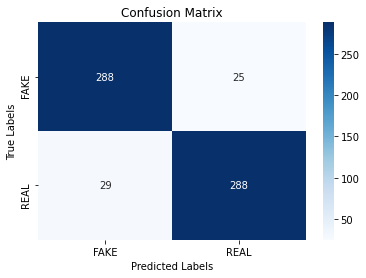

In [8]:
load_checkpoint('temp_results/model.pt', model)

evaluate(model, test_iter)

# **GPT-2**

## GPT-2: Generación de texto

En la siguiente actividad, generaremos texto usaremos GPT2 preentrenado. 

Si bien estaremos usando los pesos preentrenados de la versión pequeña (gpt2) puede usar también la versión grande (gpt2-xl).

Adicionalmente también es posible hacer finetuning de GPT2 para que genere textos según lo que usted requiera. Un tutorial para eso puede encontrarse en https://towardsdatascience.com/fine-tuning-gpt2-for-text-generation-using-pytorch-2ee61a4f1ba7

Primero instalaremos la librería (en caso de no estar instalada)

In [9]:
!pip install transformers==3.4.0

In [10]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


A continuación podemos generar un texto usando el modelo GPT2. Solamente le tenemos que entregar una frase inicial, y el modelo luego entrega una posible continuación para el texto.

In [11]:
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')

beam_output = model.generate(
    input_ids, 
    max_length=100, 
    num_beams=4, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again.

I


Vemos que no genera un texto del todo convincente, pues tiene muchas repeticiones (lo cual es muy usual en este tipo de modelos). Para resolver eso podemos restringir que no repita ciertos ngrams de la siguiente forma:

In [12]:
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')

beam_output = model.generate(
    input_ids, 
    max_length=100, 
    num_beams=5, 
    no_repeat_ngram_size=2,
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to take a step back and think about what I want to do next. I've always wanted to be a writer, so I thought I'd share my thoughts on how I would go about writing a book about my love of writing. Here are some of the things I


## Actividades

**10) Como ha visto a lo largo de este laboratorio, cada modelo trae su propio tokenizador. ¿Qué efecto tendría si usáramos el tokenizador de un modelo (ejemplo: el de BERT) para otro (ejemplo: para GPT2)?. Explique muy brevemente el efecto que podría tener en los resultados, asumiendo que solo se usará en modo "inferencia", no en modo "entrenamiento" ni "finetuning", y que el código ejecuta sin errores.**

Cuando se genere el texto que quiera generar cada uno de los modelos, estos por el contexto puede que tokenizen otra palabra que no sea la indicada.

**11) Los modelos GPT, GPT2 y GPT3 son modelos diseñado para generar texto. El modo de uso básico es entregarle un texto inicial, y el modelo simplemente completa el resto del texto según lo que estima como una continuación probable (dado lo que vio en entrenamiento). ¿Es esto un impedimento para realizar tareas más dirigidas, donde nos gustaría hacer que el modelo genere un texto siguiendo cierta lógica de interés (ej: summarization)?** Asuma que está usando el modelo sin modificaciones a la medida ni finetuning.

*Hint: esto fue mencionado durante la clase o laboratorio, así que en caso de dudas puede consultar la grabación de la clase :)*


In [ ]:
#@title Respuesta

Respuesta = 'No es un impedimento. Si se puede hacer.' #@param ["seleccione una opcion", "Si es un impedimento. No se puede hacer.", "No es un impedimento. Si se puede hacer.", "Es un impedimento en algunos casos, pero no en otros."]
Justificación = "Dado que estos modelos pueden generar texto a traves de textos iniciales, podemos regular lo que queremos que \"summarize\" ya que agregariamos la tarea al codigo inicial, a modo de una nueva tarea, sin la necesidad de finetunear" #@param {type:"string"}

**12) Supongamos que usted quiere generar con GPT2 un texto extenso (supongamos que son varias hojas de texto generado) donde el tema principal sea "New York". Como se mencionó en el laboratorio, usar un código como este puede traer un problema en cuanto al texto generado.**
 
 ```
 model.generate(input, max_length=1000000, 
    num_beams=5, 
    no_repeat_ngram_size=2,
    early_stopping=True
)
```


**¿Cuál es ese problema? ¿Cómo podría resolverse?**

*Hint: esto fue mencionado durante la clase o laboratorio, así que en caso de dudas puede consultar la grabación de la clase :)*

In [ ]:
#@title Respuesta

Problema = "El texto se va a repetir muchas veces sin tener algo que nos interese." #@param {type:"string"}
Una posible solución = "'Se puede arreglar moviendo los n-gram para que estos aumenten el tama\\xF1o.'" #@param {type:"string"}

# **Actividad Final**

En este laboratorio usamos los modelos pre-entrenados para ELMo, BERT y GPT2, los cuales fueron entrenados en inglés. **¿Qué recomendaría hacer para usarlos para el idioma español en sus propios proyectos?** Asuma que tiene recursos y tiempo acotados (ej: no es factible entrenar GPT2 desde cero para español).

Para cada arquitectura, comente si es posible o no. De ser posible proponga al menos una solución concreta (OJO: se evaluará que la solución sea super concreta). De no ser posible, justifique. No se extienda más allá de un párrafo por modelo (Ojo: se espera que la respuesta sea breve).

**13) Para el caso de ELMo**: 
- ¿Es posible?: *Escriba aquí su respuesta*
- Justificación/Solución: *Escriba aquí su respuesta*

**14) Para el caso de BERT**: 
- ¿Es posible?: *Escriba aquí su respuesta*
- Justificación/Solución: *Escriba aquí su respuesta*

**15) Para el caso de GPT2**: 
- ¿Es posible?: *Escriba aquí su respuesta*
- Justificación/Solución: *Escriba aquí su respuesta*